# 1.1 Sift Matching 

In [28]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


def showImage(Img, window_name='image'):
    cv2.imshow(window_name, Img)
    cv2.waitKey(0)
    # closing all open windows
    cv2.destroyAllWindows()
    
# 1 & 2 load in images and create instance of SIFT
left = cv2.imread("backpack_left.png", 0)
right = cv2.imread("backpack_right.png", 0)
lena = cv2.imread("lena.png", 0)

sift = cv2.SIFT_create()



In [34]:
# 3 & 4  Swift Matching generate image's key points and descriptors 
# Prints out the key_points in all images
def key_points(img):

    kp1, des1 = sift.detectAndCompute(img, None)
    img_copy = cv2.drawKeypoints(img, kp1, None)
    showImage(img_copy, "Key Points")

key_points(left)
key_points(right)
key_points(lena)


In [30]:
# 5 and 6 BFMatcher and drawMatchesknn 
# Prints out sift matchin 
def siftMatching(img1,img2):
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)


    img1_kp = cv2.drawKeypoints(img1, kp1, None)
    img2_kp = cv2.drawKeypoints(img2, kp2, None)

    bf = cv2.BFMatcher(2)
    matches = bf.knnMatch(des1, des2, k=2)
    #last parameter of drawMatchesKnn
    result = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, img1_kp )
    showImage(result)
    
siftMatching(lena,lena)
siftMatching(left,right)



# 1.2 Low's ratio test

In [35]:
#1.2 Low's ratio test
def lowes(img1, img2):
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    good = []
    for m, n in matches:
       
        if m.distance < 0.8 * n.distance: # ratio test
            good.append([m])

    img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)
    
    return  img3
    


img3 =lowes(left, right)
showImage(img3, "Lowes Ratio Backpack") #shows Backpack
img4 = lowes(lena, lena)
showImage(img4, "Lowes Ratio Lena") #shows lena 







# 1.3 Histogram
display your keypoint distances as histograms (one for lena and one for backpack images)
x-axis is the distance between the descriptors, y- axis is the count of the histograms with that gistance


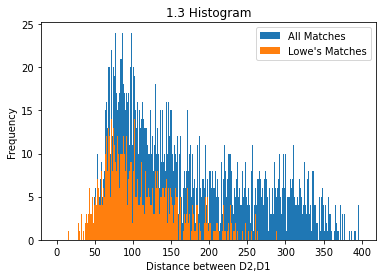

In [32]:
# Histogram for BackpackPack

kp1, des1 = sift.detectAndCompute(left, None)
kp2, des2 = sift.detectAndCompute(right , None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
all_matches = []
good = []
for m, n in matches:
    all_matches.append(m.distance)
    if m.distance < 0.8 * n.distance:
        good.append(m.distance)
        

vals1, rng1 = np.histogram(all_matches, bins = range(400))
plt.figure()
plt.bar(rng[:-1], vals1, width = 1)
vals2, rng2 = np.histogram(good, bins = range(400))
plt.bar(rng[:-1], vals2, width = 1)


plt.ylabel("Frequency")
plt.xlabel("Distance between D2,D1")
plt.title("1.3 Histogram")
plt.legend(('All Matches', "Lowe's Matches" ))
plt.show()


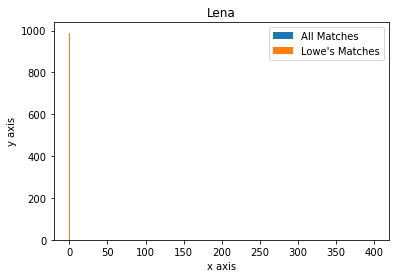

In [33]:
#Histogram for lena 

kp1, des1 = sift.detectAndCompute(lena, None)
kp2, des2 = sift.detectAndCompute(lena , None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
all_matches = []
good = []
for m, n in matches:
    all_matches.append(m.distance)
    if m.distance < 0.8 * n.distance:
        good.append(m.distance)
        

vals1, rng1 = np.histogram(all_matches, bins = range(400))
plt.figure()
plt.bar(rng[:-1], vals1, width = 1)
vals2, rng2 = np.histogram(good, bins = range(400))
plt.bar(rng[:-1], vals2, width = 1)


plt.ylabel("y axis")
plt.xlabel("x axis")
plt.title("Lena")
plt.legend(('All Matches', "Lowe's Matches" ))
plt.show()

# Conclusion
Backpack Satio Image:
It makes sense that lowe's matches is less significantly less than all of the matches.
This is because lowe's picks the best corresponding match from every initially detected set.
The Lowe's Ratio Test eliminates a number of invalid matches from the initial set.
The algorithm filters keypoint matches. It Makes the Matches more Precise. The Distribution of the Histogram for Lowe's Matches  follows the same path as the all matches. The Histogram Distribution  of the two are very similar. 
Lena Stario image:
In The Histogram for Lena, the Number of matches and Lowe's Matchs are the same because the input images are identical
